In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
def get_width_log(agent, width):
    n = 11
    for i in range (1,n):
        if i == 1:
            f = pd.read_csv(f"{agent}/run-{width}_test1-tag-Train_AverageReturns.csv").values

        data = pd.read_csv(f"{agent}/run-{width}_test{i}-tag-Train_AverageReturns.csv").values
        f = np.vstack((f, data))
    dataDQN = pd.DataFrame(f, columns = ['wall_clock', 'iteration','train_episode_returns'])
    dataDQN = dataDQN.drop(columns=['wall_clock'], axis=1)
    dataDQN['width'] = width
    return dataDQN

In [3]:
def get_agent_log(agent):
    df_list = []
    for wd in [2**i for i in range(6, 11)]:
        df_list.append(get_width_log(agent, wd))
    return pd.concat(df_list)

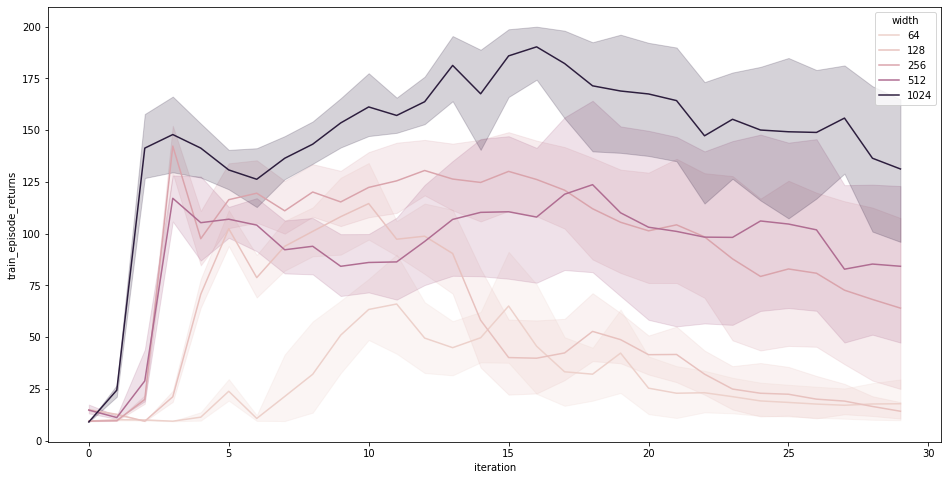

In [4]:
data_dqn = get_agent_log("dqn")
fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(x='iteration', y='train_episode_returns', hue='width', data=data_dqn);

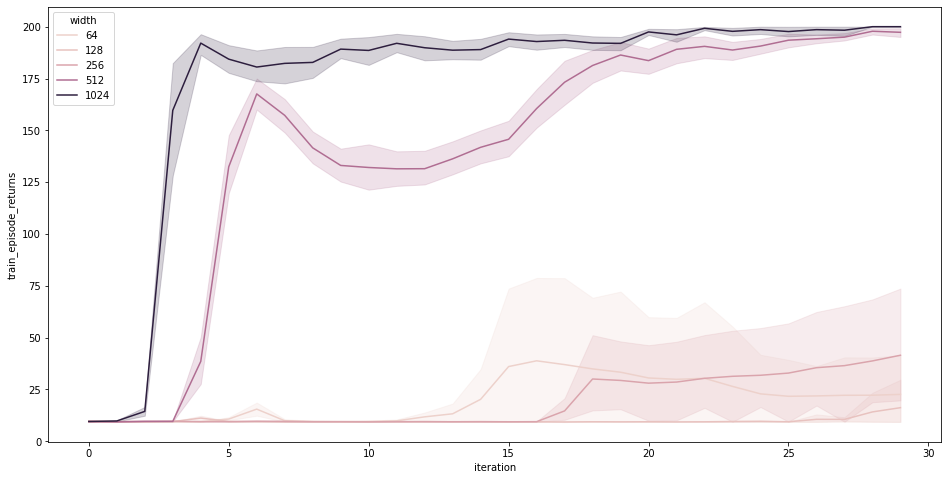

In [5]:
data_quantile = get_agent_log("quantile")
fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(x='iteration', y='train_episode_returns', hue='width', data=data_quantile);

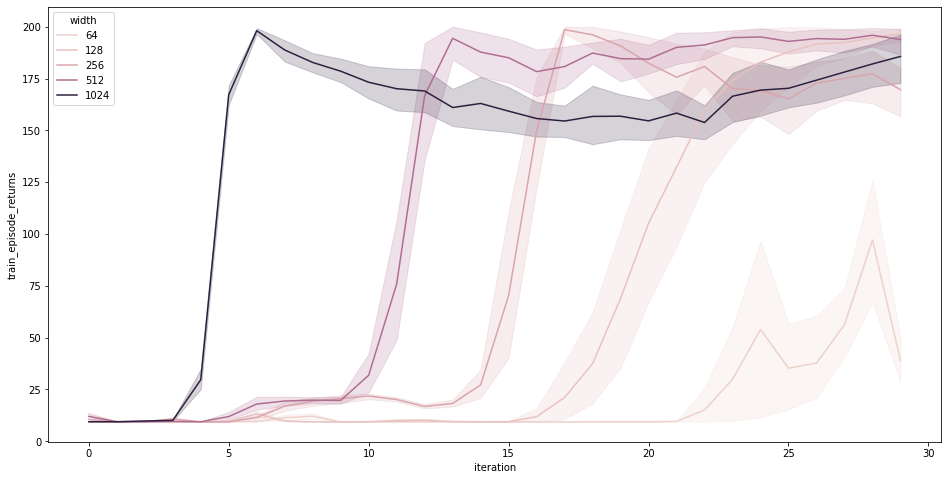

In [6]:
data_implicit = get_agent_log("implicit")
fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(x='iteration', y='train_episode_returns', hue='width', data=data_implicit);

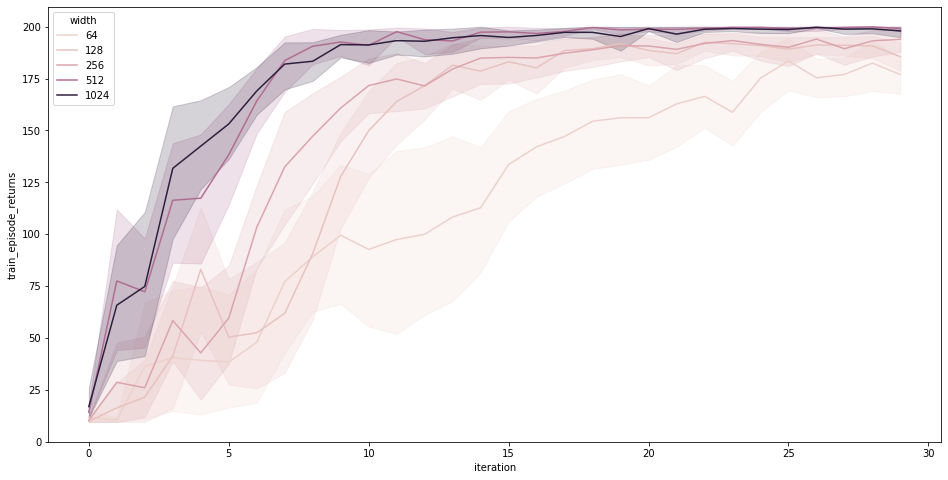

In [7]:
data_rainbow = get_agent_log("rainbow")
fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(x='iteration', y='train_episode_returns', hue='width', data=data_rainbow);